In [1]:
import os,json
import pandas as pd
from pycocotools.coco import COCO
import urllib.request
import skimage.io as io
import pathlib
import pylab
import cv2
from skimage.io import imread, imshow
import imutils
import numpy as np
from PIL import Image
import math
import copy
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original_json_path = '/data/cv_inspection_repair/training-files/tmp/annotations/annotations.json'
destination_folder = '/workspace/malathi/Annotation_task/Annotation/ROTATE'
angle_rotation = -90
#angle_rotation=90

In [3]:
annFile= original_json_path
coco=COCO(annFile)
rotated_data_1 = {}
images = []
original_annos = []
original_pts = []
rotate_annos = []
angle = 0
#angle1 = angle_rotation
imgIds = coco.getImgIds()

destination = destination_folder

destination_path_images = destination+'/Rotated_images'
destination_path_annotations = destination+'/Annotation_json'
destination_path_rotations = destination+'/Validation_images'

pathlib.Path(destination_path_images).mkdir(parents=True, exist_ok=True) 
pathlib.Path(destination_path_annotations ).mkdir(parents=True, exist_ok=True) 
pathlib.Path(destination_path_rotations ).mkdir(parents=True, exist_ok=True) 

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [27]:
i=12
print(i)
img = coco.loadImgs(imgIds[i])
img

12


[{'id': 13,
  'width': 576,
  'height': 752,
  'file_name': '/data/cv_inspection_repair/training-files/tmp/images/1904080053.JPG',
  'license': 0,
  'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/11TC- 1421 _677 157_FINAL/Combustor/1904080053.JPG',
  'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/11TC- 1421 _677 157_FINAL/Combustor/1904080053.JPG',
  'date_captured': ''}]

In [ ]:
{"segmentation": [[317, 326, 317, 330, 318, 339, 318, 343, 318, 350, 320, 354, 323, 360, 324, 363, 325, 366, 325, 371, 325, 373, 324, 374, 329, 375, 330, 370, 329, 365, 323, 353, 322, 349, 323, 344, 322, 341, 322, 338, 322, 334, 321, 329, 321, 326]], "area": 637, "bbox": [317, 326, 13, 49], "iscrowd": 0, "id": 13, "image_id": 16, "category_id": 1}

576 752


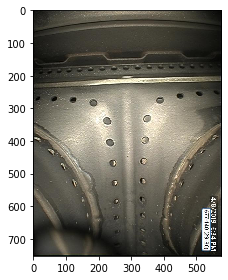

In [34]:


hgt = IMAGE.shape[0]
wid = IMAGE.shape[1]
print(wid,hgt)
imshow(IMAGE)

288 376
376 288


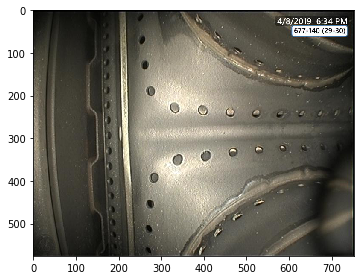

In [35]:
angle1=-90
(cX, cY) = (wid // 2, hgt // 2)
print(cX,cY) #  center points of original image

# rotate our image around the image
M = cv2.getRotationMatrix2D((cX, cY), angle1, 1.0)
rotated = cv2.warpAffine(IMAGE, M, (wid, hgt))
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(IMAGE,angle1)
imshow(rotated)
debug_image = rotated.copy()


(h1, w1) = IMAGE.shape[:2]
(h, w) = rotated.shape[:2]
(cX1, cY1) = (w1 // 2, h1 // 2)
#print(cX1,cY1) #original center points
(cX, cY) = (w // 2, h // 2)
print(cX,cY) #rotated center points

In [36]:

for id, ann in enumerate(anns_segment):
    print(id,ann)

0 {'segmentation': [[318, 232, 317, 226, 317, 220, 317, 212, 317, 204, 327, 187, 330, 180, 338, 168, 344, 160, 348, 155, 356, 149, 361, 143, 366, 141, 371, 140, 376, 139, 381, 140, 388, 141, 394, 144, 400, 148, 404, 151, 410, 156, 412, 159, 420, 160, 425, 164, 431, 166, 443, 173, 447, 175, 454, 178, 459, 180, 465, 182, 469, 180, 471, 177, 470, 175, 461, 176, 451, 171, 443, 165, 435, 160, 429, 158, 424, 157, 420, 155, 415, 155, 413, 153, 409, 150, 404, 145, 399, 142, 396, 140, 392, 138, 386, 137, 380, 137, 383, 133, 384, 130, 383, 126, 383, 122, 386, 115, 385, 110, 385, 105, 387, 103, 387, 100, 382, 98, 381, 100, 380, 105, 378, 109, 379, 113, 378, 116, 376, 121, 377, 127, 378, 130, 378, 132, 377, 134, 372, 136, 368, 137, 364, 137, 359, 139, 354, 142, 349, 147, 343, 152, 338, 158, 333, 162, 331, 166, 328, 169, 327, 174, 323, 180, 323, 182, 320, 185, 319, 190, 316, 194, 313, 198, 311, 206, 312, 212, 311, 220, 312, 225, 312, 231]], 'area': 21440, 'bbox': [311, 98, 160, 134], 'iscrowd': 0, 

In [37]:
print(ann['image_id'],imgIds[i])

16 13


In [52]:
for id, anno in enumerate(anns_segment):

    cat_id = []
    bbox = []

#------------------- Create Polygon ---------------------------------------------------------

    cat_id = int(anno["category_id"])
    bbox = anno["bbox"] # [x,y,w,h] object positioning frame
    assert len(bbox) == 4
    xmin = bbox[0]
    ymin = bbox[1]
    xmax = xmin + bbox[2]
    ymax = ymin + bbox[3]

    nonrotate_pts = anno['segmentation']
    pts1 = np.array(nonrotate_pts, np.int32)
    pts1 = pts1.reshape((-1, 1, 2))

    isClosed = True
    color = (255, 0, 0)
    thickness = 5

    # Draw a Green polygon with 
    # IMAGE = cv2.polylines(IMAGE, pts1, isClosed, color, thickness) 

#------------------- Create Bounding Box-------------------------------------------------------

    start_point = (xmin, ymin) 
    end_point = (xmax, ymax) 

    # Blue color in BGR 
    color = (0, 255,255) 
    thickness = 3

    # Draw a rectangle with blue line borders of thickness of 2 px 

   # IMAGE = cv2.rectangle(IMAGE, start_point, end_point, color, thickness) 

#--------------------- JSON Creation ------------------------------------------------------------            

    box_val1 = list(start_point + end_point)

    rotate_annos.append({"segmentation" : nonrotate_pts,
                "area" : bbox[2]*bbox[3],
                "bbox" : bbox,
                "iscrowd" : anno['iscrowd'],
                "id": anno['id'],
                "image_id" : imgIds[i],
                "category_id" : anno['category_id']})

head, tail = os.path.split(img['file_name'])
image_name = tail 

In [58]:
rotated_data_1['images']=images
#rotated_data_1['images'][i]['file_name'] = file_name


rotated_data_1['annotations'] = rotate_annos
rotated_data_1['licenses'] = coco.dataset['licenses']
cats = coco.loadCats(coco.getCatIds())       
rotated_data_1['categories'] = cats

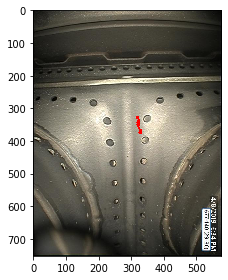

In [59]:
isClosed = True
# Green color in BGR
color = (255, 0, 0)
thickness = 5
img_poly= cv2.polylines(IMAGE, org_pts, isClosed, color, thickness) 
imshow(img_poly)


In [60]:
for val in segmnt_val:

    r_axis = val   

    for k in range(0, len(r_axis), 2):

        angle = math.radians(angle1)
        temp_point = r_axis[k] - cX1, r_axis[k+1] - cY1
        temp_point = (temp_point[0]*math.cos(angle)-temp_point[1]*math.sin(angle) , temp_point[0]*math.sin(angle)+temp_point[1]*math.cos(angle))
        temp_point = temp_point[0]+cX, temp_point[1]+cY

        r_axis[k] =  int(temp_point[0])
        r_axis[k+1] = int(temp_point[1])

        pts = np.array(r_axis, np.int32)
print(pts)

[259 250 259 246 258 237 258 233 258 226 256 222 253 216 252 213 251 210
 251 205 251 203 252 202 247 201 246 206 247 211 253 223 254 227 253 232
 254 235 254 238 254 242 255 247 255 250]


In [42]:


pts = pts.reshape((-1, 1, 2))

isClosed = True
# Green color in BGR
color = (255, 0, 0)
thickness = 5

print("NEW Polygon : ",r_axis )



NEW Polygon :  [326, 259, 330, 259, 339, 258, 343, 258, 350, 258, 354, 256, 360, 253, 363, 252, 366, 251, 371, 251, 373, 251, 374, 252, 375, 247, 370, 246, 365, 247, 353, 253, 349, 254, 344, 253, 341, 254, 338, 254, 334, 254, 329, 255, 326, 255]


[[326, 259, 330, 259, 339, 258, 343, 258, 350, 258, 354, 256, 360, 253, 363, 252, 366, 251, 371, 251, 373, 251, 374, 252, 375, 247, 370, 246, 365, 247, 353, 253, 349, 254, 344, 253, 341, 254, 338, 254, 334, 254, 329, 255, 326, 255]]


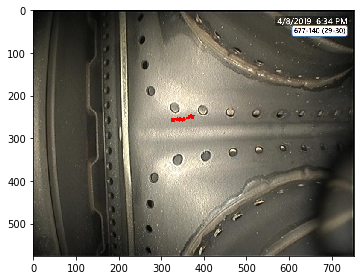

In [43]:
debug_image = cv2.polylines(debug_image, pts, isClosed, color, thickness)  
imshow(debug_image)
segments = []
segments.append(r_axis)
print(segments)

In [44]:
rect = cv2.boundingRect(pts) #creating bounding box from the rotating polygon points
    
print("NEW BBOX : ",rect )

color = (0, 255,255) 
thickness = 3

start_point = (rect[0], rect[1]) 
end_point = (rect[0]+rect[2], rect[1]+rect[3])

debug_image = cv2.rectangle(debug_image, start_point, end_point, color, thickness)

NEW BBOX :  (326, 246, 50, 14)


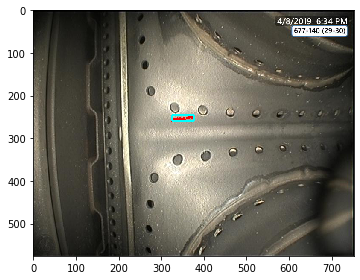

In [45]:
imshow(debug_image)

In [46]:
head1, tail1 = os.path.split(img['file_name'])
image_name1 = tail1 

In [47]:
tail1

'1904080053.JPG'

In [48]:
file_name = destination_path_images+'/'+image_name1
plt.imsave(file_name, rotated)

In [49]:
ori_pil =Image.open(img['file_name']) # original pic
rotate_pil =Image.open(file_name)  # rotated pic
masked_pil = Image.fromarray(debug_image) # masked pic

In [50]:
new_image = Image.new('RGB',(3*max(ori_pil.size[0], rotate_pil.size[0], masked_pil.size[0]),max(ori_pil.size[1], rotate_pil.size[1], masked_pil.size[1])), (250,250,250))
new_image.paste(ori_pil,(0,0))
new_image.paste(rotate_pil,(ori_pil.size[0],0))
new_image.paste(masked_pil,(rotate_pil.size[0]+ori_pil.size[0],0))

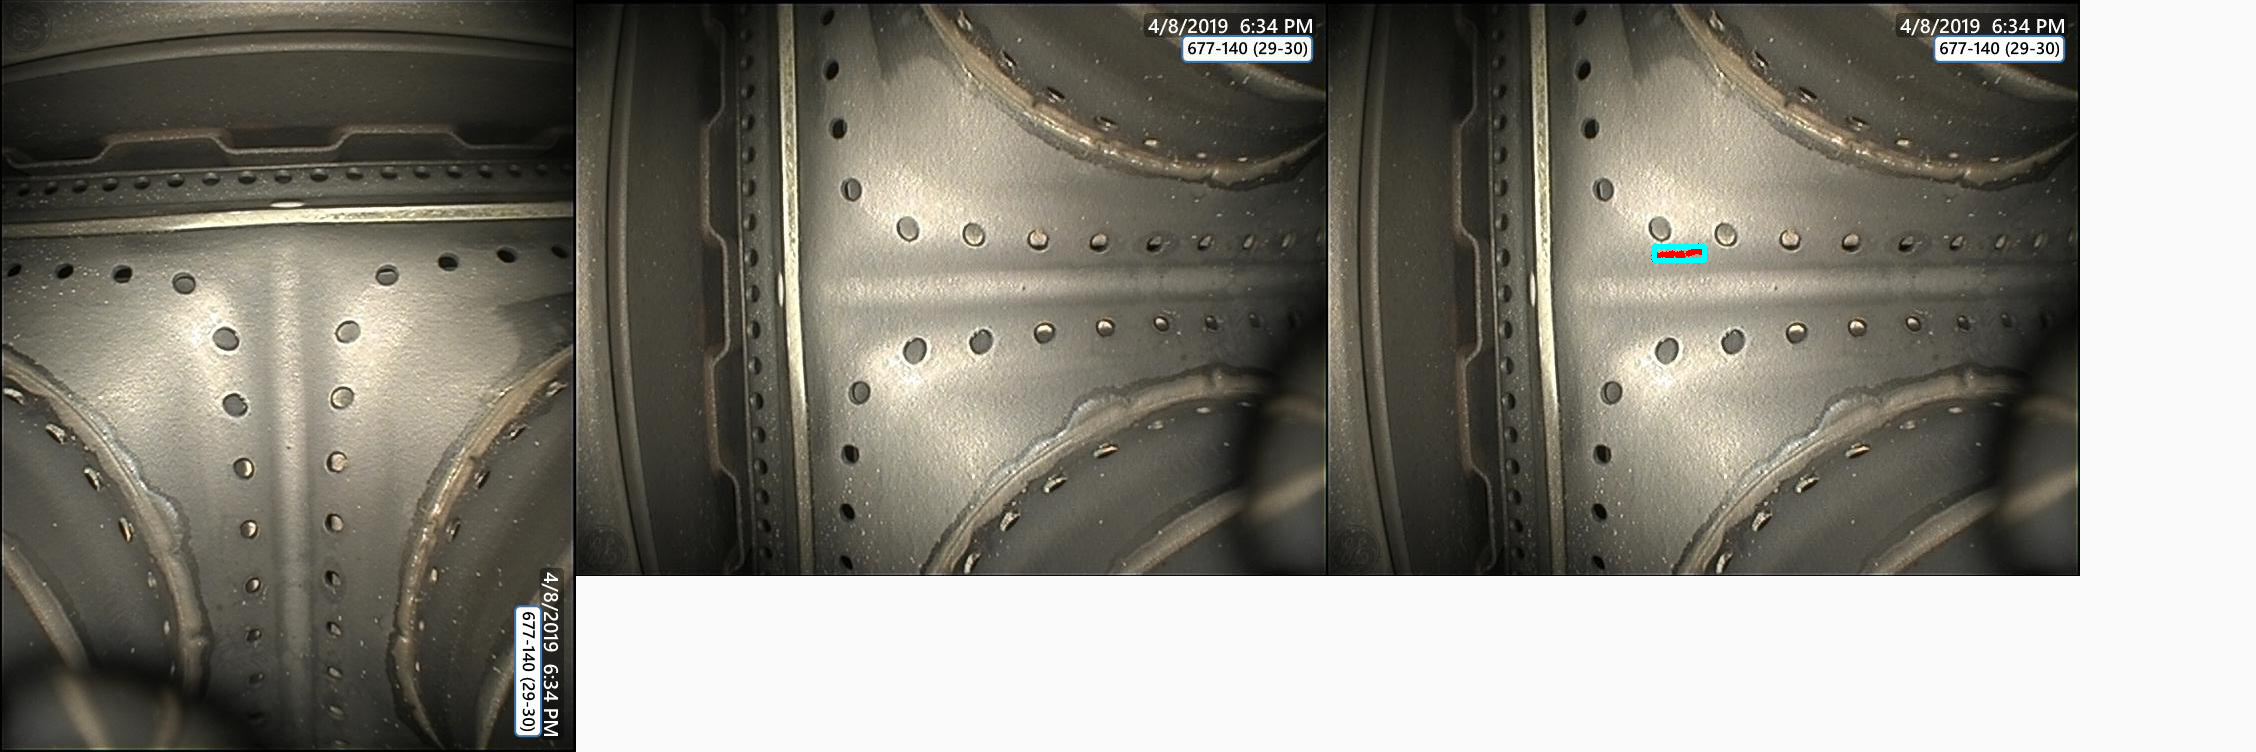

In [51]:
new_image

In [29]:
new_image.save(destination_path_rotations+'/'+image_name1,"JPEG")

In [35]:

images.append(img)

In [36]:
images

[{'id': 1,
  'width': 576,
  'height': 752,
  'file_name': '/data/cv_inspection_repair/training-files/tmp/images/LNG_COMB_General007.JPG',
  'license': 0,
  'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
  'date_captured': ''}]

In [32]:
rotate_annos.append({"segmentation" : segments,
                    "area" : rect[2]*rect[3],
                    "bbox" : list(rect),
                    "iscrowd" : ann['iscrowd'],
                    "id": ann['id'],
                    "image_id" : ann['image_id'],
                    "category_id" : ann['category_id']})

In [38]:
rotated_data_1['images']=images

In [39]:
rotated_data_1['infos'] = coco.dataset['infos']
rotated_data_1['images'][i]['file_name'] = file_name
rotated_data_1['images'][i]['width'] = rotated.shape[1]
rotated_data_1['images'][i]['height'] = rotated.shape[0]
#rotated_data_1['images'][i]['file_name'] = file_name
rotated_data_1['annotations'] = rotate_annos
rotated_data_1['licenses'] = coco.dataset['licenses']
cats = coco.loadCats(coco.getCatIds())       
rotated_data_1['categories'] = cats


In [40]:
rotated_data_1

{'infos': {'year': 2021,
  'version': '1.0',
  'description': '',
  'contributor': '',
  'url': '',
  'date_created': 'Wed Jun 23 10:56:50 2021'},
 'images': [{'id': 1,
   'width': 752,
   'height': 576,
   'file_name': '/workspace/malathi/Annotation_task/Annotation/ROTATE/Rotated_images/LNG_COMB_General007.JPG',
   'license': 0,
   'flickr_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
   'coco_url': 'http://10.79.85.55:8089/data/New_Combustors_Condition-selected_FINAL/Level1-677-190_FINAL/LNG_COMB_General007.JPG',
   'date_captured': ''}],
 'annotations': [{'segmentation': [[540,
     141,
     539,
     145,
     537,
     150,
     536,
     156,
     535,
     159,
     529,
     159,
     524,
     157,
     512,
     152,
     509,
     151,
     495,
     157,
     486,
     160,
     479,
     158,
     471,
     155,
     466,
     154,
     461,
     153,
     457,
     151,
     457,
     145,
     

In [41]:
rotate_angle=angle1
json.dump(rotated_data_1,open(destination_path_annotations+str(rotate_angle)+'.json','w'))

#print('------------------------------------------------------------')

In [ ]:
destination_path_images = destination+'/Rotated_images'
destination_path_annotations = destination+'/Annotation_json'
destination_path_rotations = destination+'/Validation_images'

In [ ]:
#ignore these cells